In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [36]:
# MSE loss function to calculate loss
def loss(y_hat_1, y1, y_hat_2, y2):
    return 0.5 * ((y_hat_1 - y1) ** 2 + (y_hat_2 - y2) ** 2)


In [38]:
# Relu function
def relu(x):
    return x if x > 0 else 0

In [40]:
# Initial assumptions
weights = np.random.randn(8)
bias = np.random.randn(2)
inputs = (0.04, 0.06)  # Features
y_values = (0.46, 0.64)  # Outputs

In [42]:
# Function to plot the network with weights and biases
def plot_network(weights, bias):
    w1, w2, w3, w4, w5, w6, w7, w8 = weights
    b1, b2 = bias
    pos = {
        'i1': (0, 1),
        'i2': (0, 0),
        'h1': (1, 1),
        'h2': (1, 0),
        'o1': (2, 1),
        'o2': (2, 0)
    }
    plt.figure(figsize=(8, 4))
    for key, (x, y) in pos.items():
        plt.scatter(x, y, s=1000)
        plt.text(x, y, key, ha='center', va='center', fontsize=12)
    connections = [
        ('i1', 'h1', w1, 'above'),  # w1: above
        ('i1', 'h2', w2, 'below'),  # w2: below to avoid w3
        ('i2', 'h1', w3, 'above'),  # w3: above to avoid w2
        ('i2', 'h2', w4, 'below'),  # w4: below
        ('h1', 'o1', w5, 'above'),  # w5: above
        ('h1', 'o2', w6, 'above'),  # w6: above to avoid w7
        ('h2', 'o1', w7, 'below'),  # w7: below to avoid w6
        ('h2', 'o2', w8, 'below')   # w8: below
    ]
    for start, end, weight, label_pos in connections:
        start_pos = np.array(pos[start])
        end_pos = np.array(pos[end])
        vector = end_pos - start_pos
        short_start = start_pos + 0.2 * vector
        short_end = start_pos + 0.8 * vector
        plt.plot([short_start[0], short_end[0]], [short_start[1], short_end[1]], 'k-')
        midpoint = (start_pos + end_pos) / 2
        if label_pos == 'above':
            label_offset = 0.1
        else:
            label_offset = -0.1
        plt.text(midpoint[0], midpoint[1] + label_offset, f'{weight:.2f}', ha='center', va='center', fontsize=9)
    # Biases positioned close to the neurons
    plt.text(1.05, 0.5, f'b1={b1:.2f}', ha='left', va='center', fontsize=9)
    plt.text(2.05, 0.5, f'b2={b2:.2f}', ha='left', va='center', fontsize=9)
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 1.5)
    plt.axis('off')
    plt.show()

In [44]:
# Forward propagation function
def forward_propagation(inputs, weights, bias, y_values):
    plot_network(weights, bias)
    w1, w2, w3, w4, w5, w6, w7, w8 = weights
    b1, b2 = bias
    i1, i2 = inputs
    y1, y2 = y_values

    # Hidden layer
    h1 = i1 * w1 + i2 * w3 + b1
    h1_out = relu(h1)
    h2 = i1 * w2 + i2 * w4 + b1
    h2_out = relu(h2)

    # Output layer
    o1 = h1_out * w5 + h2_out * w7 + b2
    o1_out = sigmoid(o1)
    o2 = h1_out * w6 + h2_out * w8 + b2
    o2_out = sigmoid(o2)

    print("\n\t-Forward Propagation-")
    print("\n")
    print("h1: ", h1, "\th1_out: ", h1_out.round(5))
    print("h2: ", h2, "\th2_out: ", h2_out.round(5))
    print("o1: ", o1, "\to1_out: ", o1_out.round(5))
    print("o2: ", o2, "\to2_out: ", o2_out.round(5))
    print("\nCurrent Loss: ", loss(o1_out, y1, o2_out, y2).round(5))

    hidden_layers = (h1_out, h2_out)
    output_layers = (o1_out, o2_out)
    backward_propagation(inputs, weights, bias, y_values, hidden_layers, output_layers)


In [46]:
# Backward propagation function
def backward_propagation(inputs, weights, bias, y_values, hidden_layers, output_layers):
    w1, w2, w3, w4, w5, w6, w7, w8 = weights
    b1, b2 = bias
    i1, i2 = inputs
    y1, y2 = y_values
    h1_out, h2_out = hidden_layers
    o1_out, o2_out = output_layers
    lr = 0.5

    # Output layer deltas
    delta_o1 = (o1_out - y1) * o1_out * (1 - o1_out)
    delta_o2 = (o2_out - y2) * o2_out * (1 - o2_out)

    # Hidden layer deltas
    delta_h1 = (delta_o1 * w5 + delta_o2 * w6) * h1_out * (1 - h1_out)
    delta_h2 = (delta_o1 * w7 + delta_o2 * w8) * h2_out * (1 - h2_out)

    # Gradients for weights
    new_w5 = w5 - lr * delta_o1 * h1_out
    new_w7 = w7 - lr * delta_o1 * h2_out
    new_w6 = w6 - lr * delta_o2 * h1_out
    new_w8 = w8 - lr * delta_o2 * h2_out
    new_w1 = w1 - lr * delta_h1 * i1
    new_w3 = w3 - lr * delta_h1 * i2
    new_w2 = w2 - lr * delta_h2 * i1
    new_w4 = w4 - lr * delta_h2 * i2

    # Gradients for biases
    new_b1 = b1 - lr * (delta_h1 + delta_h2)
    new_b2 = b2 - lr * (delta_o1 + delta_o2)

    print("\n\t-Backward Propagation-")
    print("\n")
    print("old w1: ", w1, "\tnew w1: ", new_w1.round(5))
    print("old w2: ", w2, "\tnew w2: ", new_w2.round(5))
    print("old w3: ", w3, "\tnew w3: ", new_w3.round(5))
    print("old w4: ", w4, "\tnew w4: ", new_w4.round(5))
    print("old w5: ", w5, "\tnew w5: ", new_w5.round(5))
    print("old w6: ", w6, "\tnew w6: ", new_w6.round(5))
    print("old w7: ", w7, "\tnew w7: ", new_w7.round(5))
    print("old w8: ", w8, "\tnew w8: ", new_w8.round(5))
    print("old b1: ", b1, "\tnew b1: ", new_b1.round(5))
    print("old b2: ", b2, "\tnew b2: ", new_b2.round(5))

    new_weights = (new_w1, new_w2, new_w3, new_w4, new_w5, new_w6, new_w7, new_w8)
    new_bias = (new_b1, new_b2)

    decision = input("Please push Y to calculate one more step.\n")
    if decision.lower() == 'y':
        forward_propagation(inputs, new_weights, new_bias, y_values)

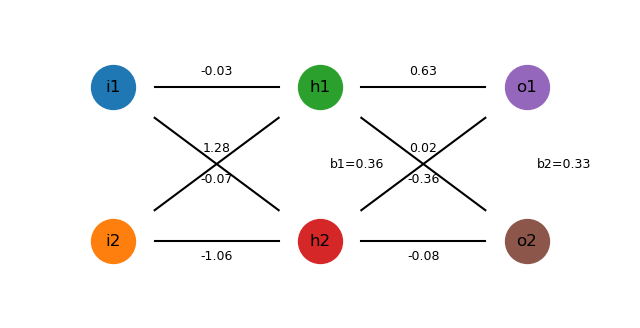


	-Forward Propagation-


h1:  0.43680190475647646 	h1_out:  0.4368
h2:  0.29459050566428246 	h2_out:  0.29459
o1:  0.5041293750084799 	o1_out:  0.62343
o2:  0.31827021449667664 	o2_out:  0.5789

Current Loss:  0.01522

	-Backward Propagation-


old w1:  -0.025566228285275907 	new w1:  -0.02568
old w2:  -0.07156261662320682 	new w2:  -0.07151
old w3:  1.2773508500498714 	new w3:  1.27717
old w4:  -1.062174875928074 	new w4:  -1.0621
old w5:  0.6324979296999349 	new w5:  0.62412
old w6:  0.019590586545789025 	new w6:  0.02284
old w7:  -0.36242758208722564 	new w7:  -0.36808
old w8:  -0.08455055331954625 	new w8:  -0.08236
old b1:  0.3611835028848952 	new b1:  0.35955
old b2:  0.3346207992347794 	new b2:  0.32288


Please push Y to calculate one more step.
 y


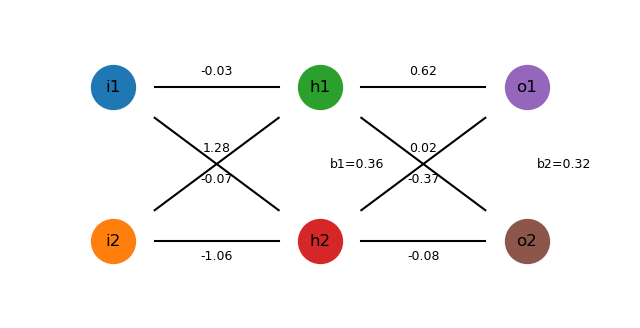


	-Forward Propagation-


h1:  0.4351514792934349 	h1_out:  0.43515
h2:  0.29296224804948945 	h2_out:  0.29296
o1:  0.4866368590715727 	o1_out:  0.61931
o2:  0.30869697518460304 	o2_out:  0.57657

Current Loss:  0.0147

	-Backward Propagation-


old w1:  -0.025684191046160404 	new w1:  -0.0258
old w2:  -0.07151005747448738 	new w2:  -0.07146
old w3:  1.2771739059085445 	new w3:  1.277
old w4:  -1.0620960372049948 	new w4:  -1.06202
old w5:  0.6241184299827262 	new w5:  0.61595
old w6:  0.022843444340109636 	new w6:  0.02621
old w7:  -0.36807893349395193 	new w7:  -0.37358
old w8:  -0.08235674186394568 	new w8:  -0.08009
old b1:  0.35954841258076864 	new b1:  0.35801
old b2:  0.3228840328263401 	new b2:  0.31185


Please push Y to calculate one more step.
 y


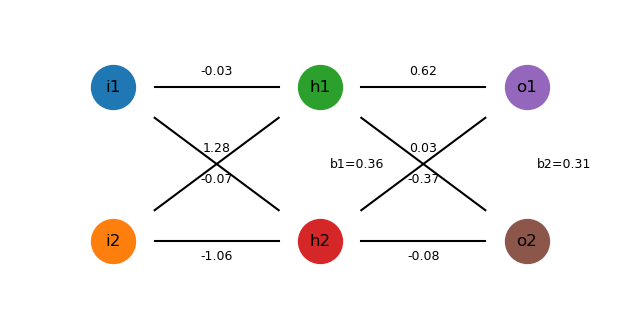


	-Forward Propagation-


h1:  0.43359897288017785 	h1_out:  0.4336
h2:  0.29143125540998405 	h2_out:  0.29143
o1:  0.4700474431093743 	o1_out:  0.61539
o2:  0.29987260028956453 	o2_out:  0.57441

Current Loss:  0.01422

	-Backward Propagation-


old w1:  -0.025797691357276668 	new w1:  -0.02591
old w2:  -0.0714580672182836 	new w2:  -0.07141
old w3:  1.2770036554418702 	new w3:  1.27684
old w4:  -1.0620180518206892 	new w4:  -1.06194
old w5:  0.6159461760190416 	new w5:  0.60797
old w6:  0.026212893843921774 	new w6:  0.02969
old w7:  -0.37358083801860126 	new w7:  -0.37894
old w8:  -0.08008828697341226 	new w8:  -0.07775
old b1:  0.3580106612079567 	new b1:  0.35657
old b2:  0.3118469464589195 	new b2:  0.30147


Please push Y to calculate one more step.
 y


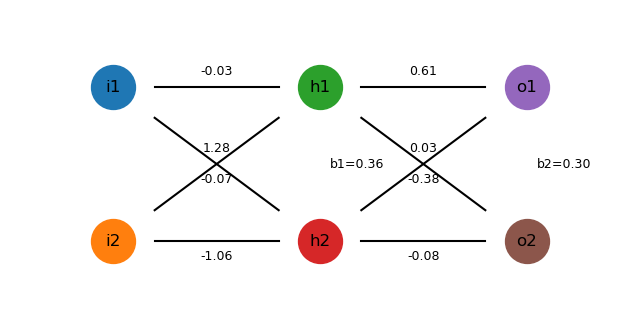


	-Forward Propagation-


h1:  0.43214062866955766 	h1_out:  0.43214
h2:  0.28999379594008917 	h2_out:  0.28999
o1:  0.4543134589211085 	o1_out:  0.61166
o2:  0.2917564705158053 	o2_out:  0.57243

Current Loss:  0.01378

	-Backward Propagation-


old w1:  -0.02590690022430165 	new w1:  -0.02601
old w2:  -0.0714066242335749 	new w2:  -0.07136
old w3:  1.2768398421413327 	new w3:  1.27668
old w4:  -1.0619408873436262 	new w4:  -1.06186
old w5:  0.6079723979357593 	new w5:  0.60019
old w6:  0.02968905446492846 	new w6:  0.03326
old w7:  -0.37894018686976594 	new w7:  -0.38416
old w8:  -0.07775188417462915 	new w8:  -0.07535
old b1:  0.35656651415004975 	new b1:  0.35521
old b2:  0.3014741878880212 	new b2:  0.29173


Please push Y to calculate one more step.
 y


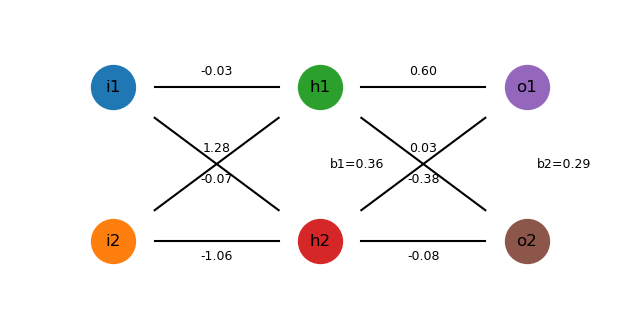


	-Forward Propagation-


h1:  0.43077286891410066 	h1_out:  0.43077
h2:  0.28864631669149565 	h2_out:  0.28865
o1:  0.4393886738054991 	o1_out:  0.60811
o2:  0.2843092565710581 	o2_out:  0.5706

Current Loss:  0.01338

	-Backward Propagation-


old w1:  -0.02601198415067685 	new w1:  -0.02611
old w2:  -0.07135570426100082 	new w2:  -0.07131
old w3:  1.27668221625177 	new w3:  1.27653
old w4:  -1.0618645073847652 	new w4:  -1.06179
old w5:  0.6001884676802453 	new w5:  0.59259
old w6:  0.03326264475740749 	new w6:  0.03692
old w7:  -0.3841636982278139 	new w7:  -0.38926
old w8:  -0.07535377822184894 	new w8:  -0.0729
old b1:  0.35521241530502157 	new b1:  0.35394
old b2:  0.29173120219376364 	new b2:  0.28258


Please push Y to calculate one more step.
 y


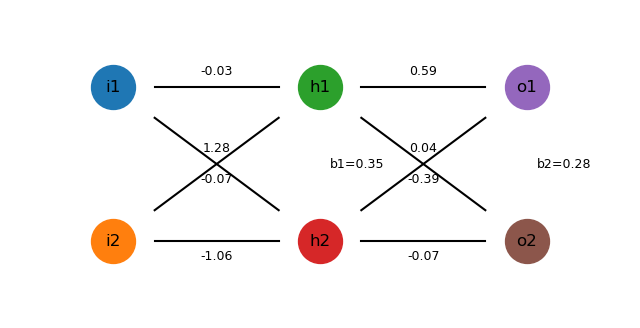


	-Forward Propagation-


h1:  0.4294922931689096 	h1_out:  0.42949
h2:  0.2873854416100537 	h2_out:  0.28739
o1:  0.4252284310964235 	o1_out:  0.60473
o2:  0.27749303513731716 	o2_out:  0.56893

Current Loss:  0.013

	-Backward Propagation-


old w1:  -0.026113104536229007 	new w1:  -0.02621
old w2:  -0.07130528107925144 	new w2:  -0.07126
old w3:  1.2765305356734418 	new w3:  1.27638
old w4:  -1.0617888726121412 	new w4:  -1.06171
old w5:  0.592585947713058 	new w5:  0.58516
old w6:  0.03692496360363461 	new w6:  0.04067
old w7:  -0.38925788949300183 	new w7:  -0.39423
old w8:  -0.07289978234188997 	new w8:  -0.0704
old b1:  0.3539449852099522 	new b1:  0.35276
old b2:  0.2825843839856145 	new b2:  0.274


Please push Y to calculate one more step.
 y


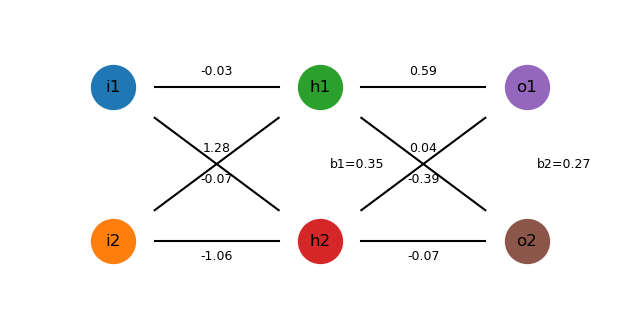


	-Forward Propagation-


h1:  0.4282956744296543 	h1_out:  0.4283
h2:  0.28620796754151945 	h2_out:  0.28621
o1:  0.41178975108184174 	o1_out:  0.60152
o2:  0.2712713716780243 	o2_out:  0.5674

Current Loss:  0.01265

	-Backward Propagation-


old w1:  -0.026210417246893474 	new w1:  -0.0263
old w2:  -0.07125532709206173 	new w2:  -0.07121
old w3:  1.2763845666074451 	new w3:  1.27624
old w4:  -1.0617139416313566 	new w4:  -1.06164
old w5:  0.5851566292915782 	new w5:  0.57789
old w6:  0.040667868472479024 	new w6:  0.04448
old w7:  -0.3942290565881445 	new w7:  -0.39908
old w8:  -0.0703952988255484 	new w8:  -0.06785
old b1:  0.35276101712308333 	new b1:  0.35166
old b2:  0.2740011949243255 	new b2:  0.26595


Please push Y to calculate one more step.
 y


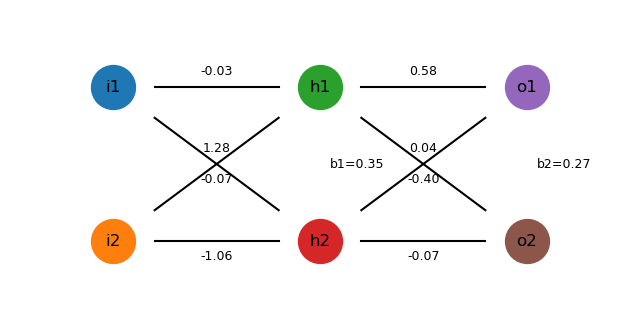


	-Forward Propagation-


h1:  0.42717995373771184 	h1_out:  0.42718
h2:  0.2851108587338319 	h2_out:  0.28511
o1:  0.3990313981418822 	o1_out:  0.59845
o2:  0.2656093748100687 	o2_out:  0.56601

Current Loss:  0.01232

	-Backward Propagation-


old w1:  -0.0263040723277334 	new w1:  -0.02639
old w2:  -0.07120581383247913 	new w2:  -0.07116
old w3:  1.2762440839861853 	new w3:  1.27611
old w4:  -1.0616396717419827 	new w4:  -1.06157
old w5:  0.5778925617312403 	new w5:  0.57079
old w6:  0.044483751623629136 	new w6:  0.04837
old w7:  -0.3990832592725334 	new w7:  -0.40383
old w8:  -0.0678453404060034 	new w8:  -0.06525
old b1:  0.35165747159165006 	new b1:  0.35063
old b2:  0.2659502511136517 	new b2:  0.2584


Please push Y to calculate one more step.
 y


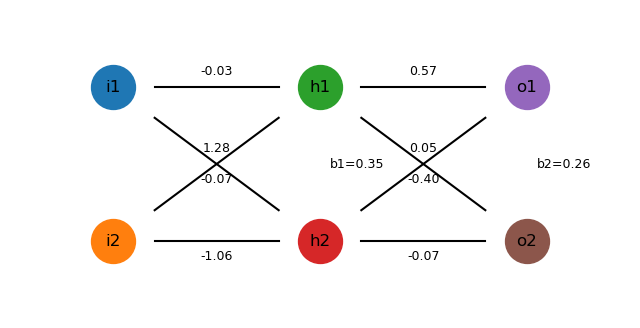


	-Forward Propagation-


h1:  0.42614223369227155 	h1_out:  0.42614
h2:  0.2840912402715833 	h2_out:  0.28409
o1:  0.3869139194142852 	o1_out:  0.59554
o2:  0.2604737265877371 	o2_out:  0.56475

Current Loss:  0.01202

	-Backward Propagation-


old w1:  -0.026394213834538428 	new w1:  -0.02648
old w2:  -0.07115671239165633 	new w2:  -0.07111
old w3:  1.2761088717259776 	new w3:  1.27598
old w4:  -1.0615660195807486 	new w4:  -1.06149
old w5:  0.570786073929267 	new w5:  0.56383
old w6:  0.04836551497912755 	new w6:  0.05231
old w7:  -0.40382631152035997 	new w7:  -0.40846
old w8:  -0.06525455197128391 	new w8:  -0.06263
old b1:  0.35063146994209443 	new b1:  0.34968
old b2:  0.2584013846037432 	new b2:  0.25133


Please push Y to calculate one more step.
 y


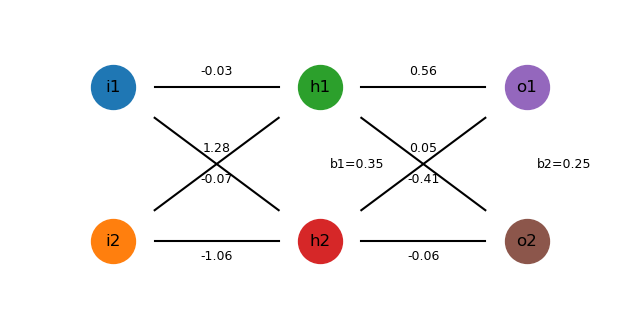


	-Forward Propagation-


h1:  0.425179771227472 	h1_out:  0.42518
h2:  0.2831463907969629 	h2_out:  0.28315
o1:  0.3753996597443147 	o1_out:  0.59276
o2:  0.2558326926308207 	o2_out:  0.56361

Current Loss:  0.01173

	-Backward Propagation-


old w1:  -0.02648097976234203 	new w1:  -0.02656
old w2:  -0.07110799377962013 	new w2:  -0.07106
old w3:  1.2759787228342723 	new w3:  1.27585
old w4:  -1.0614929416626944 	new w4:  -1.06142
old w5:  0.5638297893208727 	new w5:  0.55702
old w6:  0.052306544253687255 	new w6:  0.0563
old w7:  -0.408463776117469 	new w7:  -0.413
old w8:  -0.06262723225022386 	new w8:  -0.05997
old b1:  0.3496802870479094 	new b1:  0.3488
old b2:  0.25132568288859236 	new b2:  0.2447


Please push Y to calculate one more step.
 y


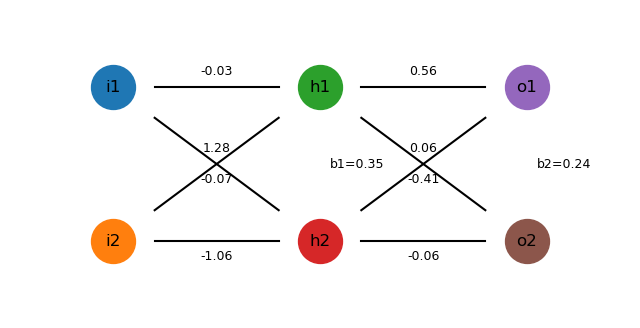


	-Forward Propagation-


h1:  0.42428996994162294 	h1_out:  0.42429
h2:  0.28227373480083395 	h2_out:  0.28227
o1:  0.36445275712851977 	o1_out:  0.59012
o2:  0.2516561156049984 	o2_out:  0.56258

Current Loss:  0.01146

	-Backward Propagation-


old w1:  -0.026564502052106084 	new w1:  -0.02664
old w2:  -0.07105962922538327 	new w2:  -0.07101
old w3:  1.2758534393996261 	new w3:  1.27573
old w4:  -1.061420394831339 	new w4:  -1.06135
old w5:  0.5570166353178898 	new w5:  0.55034
old w6:  0.05630068282159361 	new w6:  0.06034
old w7:  -0.413000962729897 	new w7:  -0.41744
old w8:  -0.05996735519026705 	new w8:  -0.05728
old b1:  0.34880134365972965 	new b1:  0.34799
old b2:  0.24469550989861644 	new b2:  0.23848


Please push Y to calculate one more step.
 y


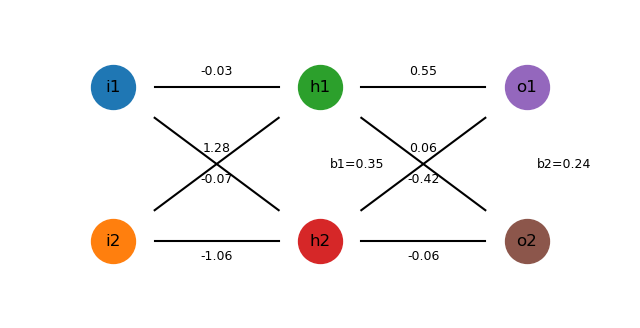


	-Forward Propagation-


h1:  0.4234703722049456 	h1_out:  0.42347
h2:  0.28147083470736706 	h2_out:  0.28147
o1:  0.3540391223358401 	o1_out:  0.5876
o2:  0.2479153951469104 	o2_out:  0.56166

Current Loss:  0.01121

	-Backward Propagation-


old w1:  -0.026644906659515955 	new w1:  -0.02672
old w2:  -0.07101159042348196 	new w2:  -0.07096
old w3:  1.2757328324885113 	new w3:  1.27562
old w4:  -1.061348336628487 	new w4:  -1.06128
old w5:  0.5503398481605188 	new w5:  0.54379
old w6:  0.06034220570014064 	new w6:  0.06443
old w7:  -0.41744292879296624 	new w7:  -0.42179
old w8:  -0.05727859081205785 	new w8:  -0.05456
old b1:  0.34799219852201557 	new b1:  0.34725
old b2:  0.23848451160613612 	new b2:  0.23267


Please push Y to calculate one more step.
 y


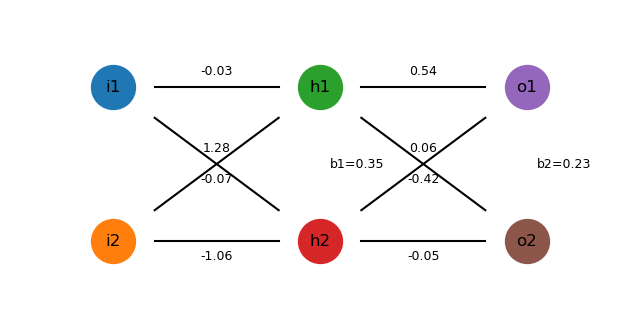


	-Forward Propagation-


h1:  0.42271865122128655 	h1_out:  0.42272
h2:  0.2807353829250504 	h2_out:  0.28074
o1:  0.344126405897434 	o1_out:  0.58519
o2:  0.24458345693095898 	o2_out:  0.56084

Current Loss:  0.01097

	-Backward Propagation-


old w1:  -0.026722313672272832 	new w1:  -0.0268
old w2:  -0.0709638497336051 	new w2:  -0.07092
old w3:  1.275616721969376 	new w3:  1.2755
old w4:  -1.0612767255936717 	new w4:  -1.06121
old w5:  0.5437929739984002 	new w5:  0.53737
old w6:  0.06442579394634293 	new w6:  0.06855
old w7:  -0.4217944826585665 	new w7:  -0.42606
old w8:  -0.0545643253812204 	new w8:  -0.05183
old b1:  0.3472505404500149 	new b1:  0.34657
old b2:  0.23266760899004432 	new b2:  0.22722


Please push Y to calculate one more step.
 y


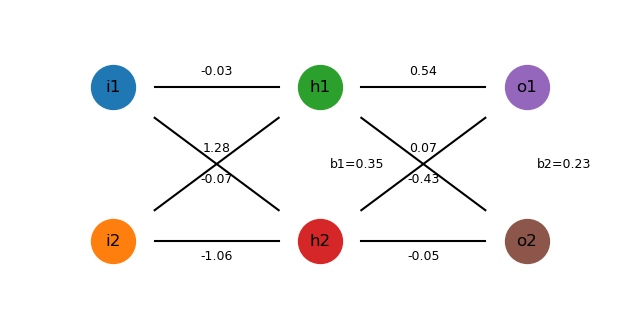


	-Forward Propagation-


h1:  0.42203260317698343 	h1_out:  0.42203
h2:  0.2800651939949658 	h2_out:  0.28007
o1:  0.3346839552051629 	o1_out:  0.5829
o2:  0.24163471320731297 	o2_out:  0.56012

Current Loss:  0.01074

	-Backward Propagation-


old w1:  -0.02679683746444749 	new w1:  -0.02687
old w2:  -0.07091638033948326 	new w2:  -0.07087
old w3:  1.275504936281114 	new w3:  1.2754
old w4:  -1.061205521502489 	new w4:  -1.06113
old w5:  0.5373698669100205 	new w5:  0.53106
old w6:  0.06854650969370926 	new w6:  0.0727
old w7:  -0.4260601885194629 	new w7:  -0.43024
old w8:  -0.05182768078340115 	new w8:  -0.04907
old b1:  0.3465741804986945 	new b1:  0.34596
old b2:  0.22722098075549294 	new b2:  0.22212


Please push Y to calculate one more step.
 y


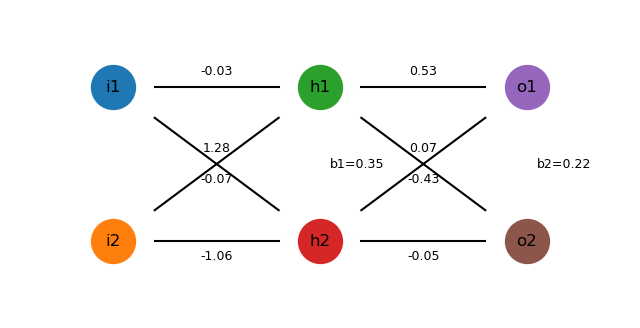


	-Forward Propagation-


h1:  0.4214101395754415 	h1_out:  0.42141
h2:  0.2794581969329205 	h2_out:  0.27946
o1:  0.3256827640510798 	o1_out:  0.58071
o2:  0.23904501680502077 	o2_out:  0.55948

Current Loss:  0.01053

	-Backward Propagation-


old w1:  -0.02686858687837358 	new w1:  -0.02694
old w2:  -0.07086915637266643 	new w2:  -0.07082
old w3:  1.275397312160225 	new w3:  1.27529
old w4:  -1.0611346855522636 	new w4:  -1.06106
old w5:  0.5310646844710775 	new w5:  0.52487
old w6:  0.07269977199767236 	new w6:  0.07688
old w7:  -0.43024437270249327 	new w7:  -0.43435
old w8:  -0.04907153302582231 	new w8:  -0.0463
old b1:  0.345961044320963 	new b1:  0.34541
old b2:  0.22212203788050947 	new b2:  0.21735


Please push Y to calculate one more step.
 y


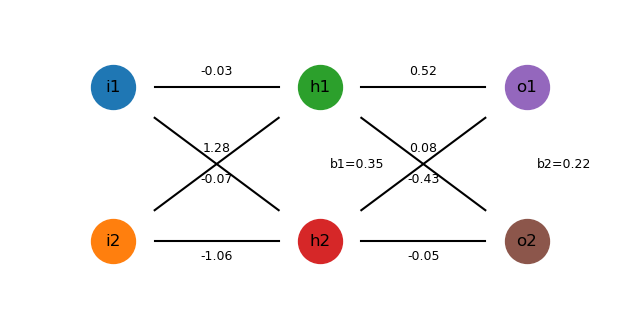


	-Forward Propagation-


h1:  0.4208492798279904 	h1_out:  0.42085
h2:  0.27891242783432124 	h2_out:  0.27891
o1:  0.3170954165770792 	o1_out:  0.57862
o2:  0.23679161029221513 	o2_out:  0.55892

Current Loss:  0.01032

	-Backward Propagation-


old w1:  -0.026937665426220597 	new w1:  -0.027
old w2:  -0.07082215300626865 	new w2:  -0.07078
old w3:  1.2752936943384543 	new w3:  1.27519
old w4:  -1.061064180502667 	new w4:  -1.06099
old w5:  0.5248718813935168 	new w5:  0.51879
old w6:  0.07688133361035886 	new w6:  0.08109
old w7:  -0.4343511309873302 	new w7:  -0.43838
old w8:  -0.046298529818489455 	new w8:  -0.04351
old b1:  0.345409164784732 	new b1:  0.34492
old b2:  0.21734939176691476 	new b2:  0.21288


Please push Y to calculate one more step.
 y


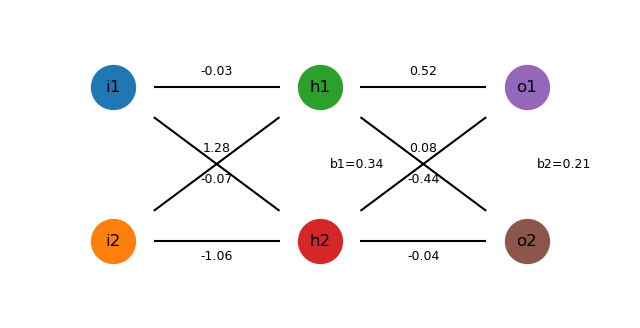


	-Forward Propagation-


h1:  0.4203481441492334 	h1_out:  0.42035
h2:  0.27842602278857853 	h2_out:  0.27843
o1:  0.3088960272837735 	o1_out:  0.57662
o2:  0.23485307171705402 	o2_out:  0.55844

Current Loss:  0.01013

	-Backward Propagation-


old w1:  -0.027004171504815645 	new w1:  -0.02707
old w2:  -0.0707753465232152 	new w2:  -0.07073
old w3:  1.2751939352205617 	new w3:  1.2751
old w4:  -1.0609939707780869 	new w4:  -1.06092
old w5:  0.5187862016776322 	new w5:  0.5128
old w6:  0.08108725876634186 	new w6:  0.08531
old w7:  -0.4383843366643678 	new w7:  -0.44235
old w8:  -0.04351110721193509 	new w8:  -0.04071
old b1:  0.3449166748961923 	new b1:  0.34448
old b2:  0.2128828175086201 	new b2:  0.2087


Please push Y to calculate one more step.
 y


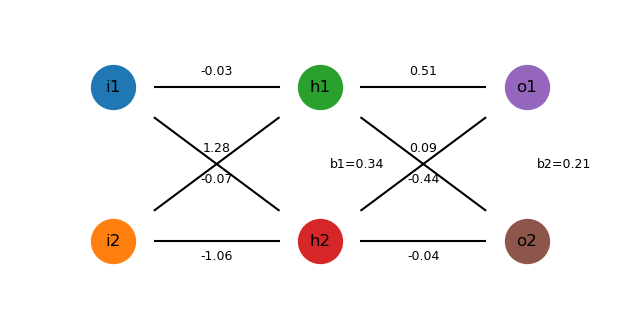


	-Forward Propagation-


h1:  0.41990494678748325 	h1_out:  0.4199
h2:  0.2779972111324342 	h2_out:  0.278
o1:  0.30106017846820643 	o1_out:  0.5747
o2:  0.23320925811700766 	o2_out:  0.55804

Current Loss:  0.00994

	-Backward Propagation-


old w1:  -0.02706819861850052 	new w1:  -0.02713
old w2:  -0.07072871436300916 	new w2:  -0.07068
old w3:  1.2750978945500344 	new w3:  1.27501
old w4:  -1.0609240225377778 	new w4:  -1.06085
old w5:  0.5128026696496015 	new w5:  0.50692
old w6:  0.08531390202954224 	new w6:  0.08956
old w7:  -0.4423476490947451 	new w7:  -0.44624
old w8:  -0.04071150528696209 	new w8:  -0.0379
old b1:  0.3444818010592212 	new b1:  0.3441
old b2:  0.20870321355583896 	new b2:  0.20479


Please push Y to calculate one more step.
 y


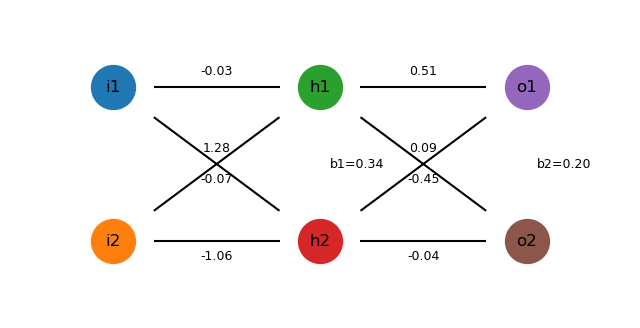


	-Forward Propagation-


h1:  0.41951798960718295 	h1_out:  0.41952
h2:  0.277624309058108 	h2_out:  0.27762
o1:  0.293564856218036 	o1_out:  0.57287
o2:  0.23184124777834866 	o2_out:  0.5577

Current Loss:  0.00976

	-Backward Propagation-


old w1:  -0.027129835605839907 	new w1:  -0.02719
old w2:  -0.07068223515054763 	new w2:  -0.07064
old w3:  1.2750054390690253 	new w3:  1.27492
old w4:  -1.0608543037190856 	new w4:  -1.06078
old w5:  0.5069165801956 	new w5:  0.50112
old w6:  0.08955788822635746 	new w6:  0.09382
old w7:  -0.44624452257815417 	new w7:  -0.45008
old w8:  -0.03790178290615791 	new w8:  -0.03508
old b1:  0.344102856687275 	new b1:  0.34378
old b2:  0.20479255884755487 	new b2:  0.20113


Please push Y to calculate one more step.
 y


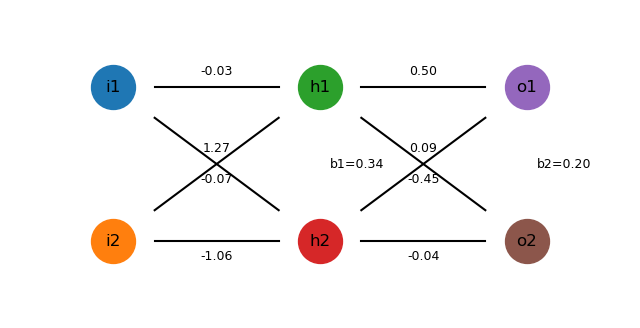


	-Forward Propagation-


h1:  0.41918565602973573 	h1_out:  0.41919
h2:  0.2773057135818557 	h2_out:  0.27731
o1:  0.28638838588182985 	o1_out:  0.57111
o2:  0.2307312820497659 	o2_out:  0.55743

Current Loss:  0.00958

	-Backward Propagation-


old w1:  -0.0271891668668599 	new w1:  -0.02725
old w2:  -0.07063588871006822 	new w2:  -0.07059
old w3:  1.2749164421774952 	new w3:  1.27483
old w4:  -1.0607847840583664 	new w4:  -1.06072
old w5:  0.5011234884505004 	new w5:  0.49542
old w6:  0.09381609347035727 	new w6:  0.09809
old w7:  -0.45007821537056447 	new w7:  -0.45385
old w8:  -0.035083831547742986 	new w8:  -0.03226
old b1:  0.3437782361737604 	new b1:  0.34351
old b2:  0.20113386830477967 	new b2:  0.19771


Please push Y to calculate one more step.
 y


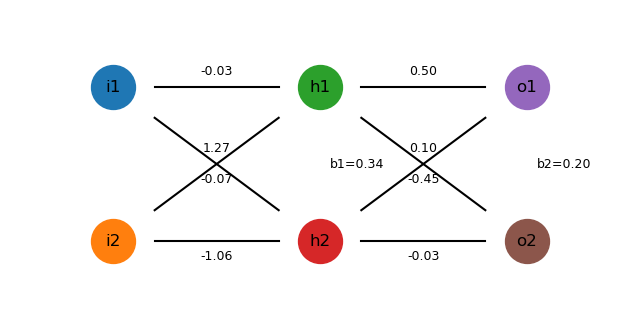


	-Forward Propagation-


h1:  0.41890640533131107 	h1_out:  0.41891
h2:  0.2770398968708194 	h2_out:  0.27704
o1:  0.2795103677575128 	o1_out:  0.56943
o2:  0.22986270736124498 	o2_out:  0.55721

Current Loss:  0.00941

	-Backward Propagation-


old w1:  -0.02724627258821582 	new w1:  -0.0273
old w2:  -0.07058965606689824 	new w2:  -0.07054
old w3:  1.2748307835954613 	new w3:  1.27475
old w4:  -1.0607154350936114 	new w4:  -1.06065
old w5:  0.4954191991533907 	new w5:  0.4898
old w6:  0.09808562726858557 	new w6:  0.10236
old w7:  -0.4538517987250009 	new w7:  -0.45757
old w8:  -0.03225938825024723 	new w8:  -0.02943
old b1:  0.343506409219112 	new b1:  0.34329
old b2:  0.19771114742145918 	new b2:  0.19451


Please push Y to calculate one more step.
 y


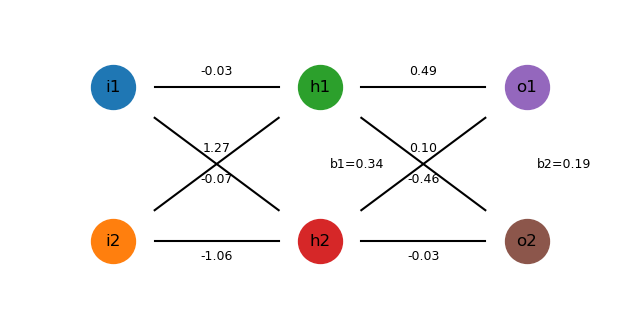


	-Forward Propagation-


h1:  0.41867876729043374 	h1_out:  0.41868
h2:  0.2768254009204175 	h2_out:  0.27683
o1:  0.2729116135902933 	o1_out:  0.56781
o2:  0.22921991796904764 	o2_out:  0.55706

Current Loss:  0.00925

	-Backward Propagation-


old w1:  -0.02730122896428417 	new w1:  -0.02735
old w2:  -0.07054351943930942 	new w2:  -0.0705
old w3:  1.2747483490313587 	new w3:  1.27467
old w4:  -1.0606462301522281 	new w4:  -1.06058
old w5:  0.4897997558429575 	new w5:  0.48426
old w6:  0.1023638156878642 	new w6:  0.10665
old w7:  -0.4575681658547004 	new w7:  -0.46123
old w8:  -0.02943004770212767 	new w8:  -0.0266
old b1:  0.34328591550712356 	new b1:  0.34312
old b2:  0.194509346555956 	new b2:  0.19151


Please push Y to calculate one more step.
 y


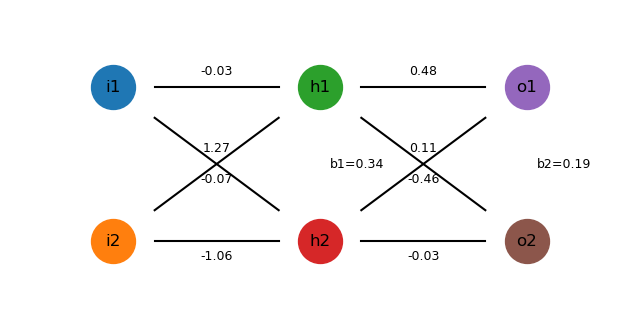


	-Forward Propagation-


h1:  0.41850133717407656 	h1_out:  0.4185
h2:  0.2766608325705411 	h2_out:  0.27666
o1:  0.26657408434423624 	o1_out:  0.56625
o2:  0.22878829983716353 	o2_out:  0.55695

Current Loss:  0.00909

	-Backward Propagation-


old w1:  -0.027354108412663756 	new w1:  -0.0274
old w2:  -0.07049746222245255 	new w2:  -0.07045
old w3:  1.2746690298587893 	new w3:  1.27459
old w4:  -1.060577144326943 	new w4:  -1.06051
old w5:  0.4842614300324236 	new w5:  0.4788
old w6:  0.10664818555083916 	new w6:  0.11094
old w7:  -0.461230040739952 	new w7:  -0.46484
old w8:  -0.026597273514210318 	new w8:  -0.02376
old b1:  0.34311535971905577 	new b1:  0.34299
old b2:  0.19151431541149616 	new b2:  0.18871


Please push Y to calculate one more step.
 y


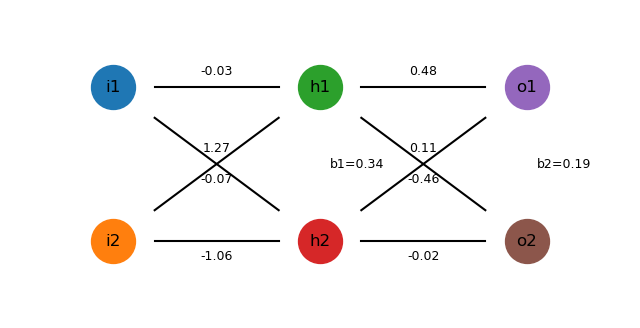


	-Forward Propagation-


h1:  0.4183727710482057 	h1_out:  0.41837
h2:  0.27654485884614205 	h2_out:  0.27654
o1:  0.26048082960497687 	o1_out:  0.56475
o2:  0.22855417597253966 	o2_out:  0.55689

Current Loss:  0.00894

	-Backward Propagation-


old w1:  -0.027404979782971572 	new w1:  -0.02745
old w2:  -0.07045146896605398 	new w2:  -0.07041
old w3:  1.2745927228033276 	new w3:  1.27452
old w4:  -1.0605081544423451 	new w4:  -1.06044
old w5:  0.4788007104755044 	new w5:  0.47341
old w6:  0.11093644962527799 	new w6:  0.11523
old w7:  -0.4648399867182682 	new w7:  -0.4684
old w8:  -0.023762408715144925 	new w8:  -0.02093
old b1:  0.3429934068713249 	new b1:  0.34292
old b2:  0.1887127580965365 	new b2:  0.18609


Please push Y to calculate one more step.
 y


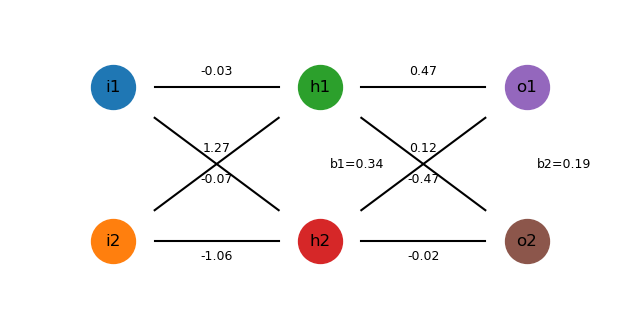


	-Forward Propagation-


h1:  0.4182917813969765 	h1_out:  0.41829
h2:  0.2764762026061234 	h2_out:  0.27648
o1:  0.2546159288820794 	o1_out:  0.56331
o2:  0.2285047534534432 	o2_out:  0.55688

Current Loss:  0.00879

	-Backward Propagation-


old w1:  -0.02745390855814442 	new w1:  -0.0275
old w2:  -0.0704055253472994 	new w2:  -0.07036
old w3:  1.2745193296405684 	new w3:  1.27445
old w4:  -1.0604392390142132 	new w4:  -1.06037
old w5:  0.4734142926110729 	new w5:  0.4681
old w6:  0.11522649276584618 	new w6:  0.11952
old w7:  -0.46840041481274836 	new w7:  -0.47191
old w8:  -0.020926685511218745 	new w8:  -0.01809
old b1:  0.34291877796086817 	new b1:  0.34289
old b2:  0.18609218907356592 	new b2:  0.18364


Please push Y to calculate one more step.
 y


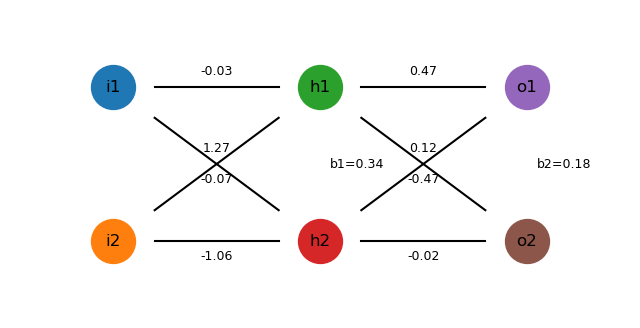


	-Forward Propagation-


h1:  0.41825713303381595 	h1_out:  0.41826
h2:  0.2764536384835429 	h2_out:  0.27645
o1:  0.2489644350057401 	o1_out:  0.56192
o2:  0.2286280723254207 	o2_out:  0.55691

Current Loss:  0.00865

	-Backward Propagation-


old w1:  -0.02750095704771916 	new w1:  -0.02755
old w2:  -0.07035961814010529 	new w2:  -0.07031
old w3:  1.2744487569062062 	new w3:  1.27438
old w4:  -1.060370378203422 	new w4:  -1.0603
old w5:  0.46809906825432146 	new w5:  0.46285
old w6:  0.11951635896486387 	new w6:  0.1238
old w7:  -0.4719135917660377 	new w7:  -0.47538
old w8:  -0.018091234352145727 	new w8:  -0.01526
old b1:  0.34289024590135236 	new b1:  0.34291
old b2:  0.1836408902354455 	new b2:  0.18135


Please push Y to calculate one more step.
 y


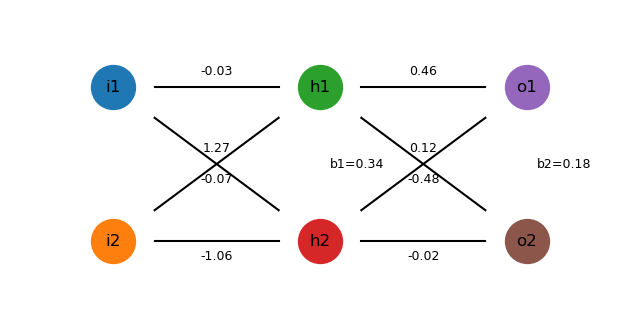


	-Forward Propagation-


h1:  0.41826763928725635 	h1_out:  0.41827
h2:  0.27647598909982235 	h2_out:  0.27648
o1:  0.24351231975169266 	o1_out:  0.56058
o2:  0.22891295648563448 	o2_out:  0.55698

Current Loss:  0.0085

	-Backward Propagation-


old w1:  -0.027546184572774152 	new w1:  -0.02759
old w2:  -0.0703137351817824 	new w2:  -0.07027
old w3:  1.2743809156186237 	new w3:  1.27432
old w4:  -1.0603015537659377 	new w4:  -1.06023
old w5:  0.4628521155856178 	new w5:  0.45767
old w6:  0.12380423926704705 	new w6:  0.12809
old w7:  -0.4753816477575581 	new w7:  -0.47881
old w8:  -0.01525709234404132 	new w8:  -0.01243
old b1:  0.3429066317330499 	new b1:  0.34297
old b2:  0.18134786929025823 	new b2:  0.1792


Please push Y to calculate one more step.
 y


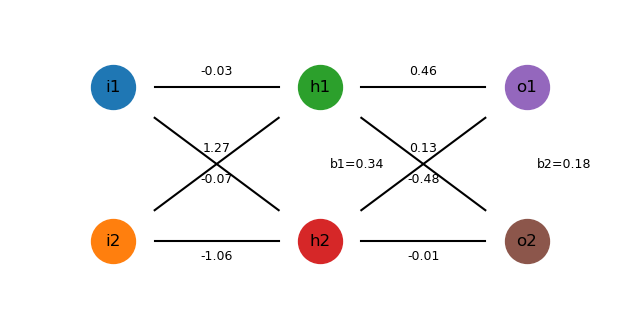


	-Forward Propagation-


h1:  0.41832215844445636 	h1_out:  0.41832
h2:  0.27654212153577246 	h2_out:  0.27654
o1:  0.2382464217783502 	o1_out:  0.55928
o2:  0.229348966632255 	o2_out:  0.55709

Current Loss:  0.00837

	-Backward Propagation-


old w1:  -0.027589647642380272 	new w1:  -0.02763
old w2:  -0.07026786533792632 	new w2:  -0.07022
old w3:  1.2743157210142144 	new w3:  1.27425
old w4:  -1.0602327490001535 	new w4:  -1.06016
old w5:  0.4576706894745133 	new w5:  0.45255
old w6:  0.1280884605027004 	new w6:  0.13237
old w7:  -0.4788065837900381 	new w7:  -0.48219
old w8:  -0.012425211049882078 	new w8:  -0.0096
old b1:  0.3429668010892987 	new b1:  0.34307
old b2:  0.179202819587202 	new b2:  0.1772


Please push Y to calculate one more step.
 y


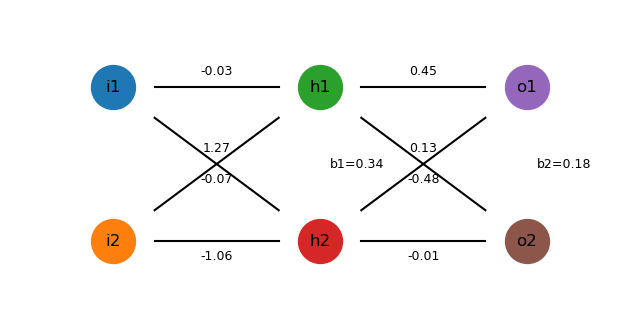


	-Forward Propagation-


h1:  0.4184195904357366 	h1_out:  0.41842
h2:  0.2766509440426649 	h2_out:  0.27665
o1:  0.23315439691971723 	o1_out:  0.55803
o2:  0.2299263553196268 	o2_out:  0.55723

Current Loss:  0.00823

	-Backward Propagation-


old w1:  -0.027631400121540143 	new w1:  -0.02767
old w2:  -0.07022199846622361 	new w2:  -0.07018
old w3:  1.2742530922954747 	new w3:  1.27419
old w4:  -1.0601639486925996 	new w4:  -1.0601
old w5:  0.45255221216504044 	new w5:  0.44749
old w6:  0.13236747479403227 	new w6:  0.13664
old w7:  -0.4821902787381083 	new w7:  -0.48553
old w8:  -0.00959646371647032 	new w8:  -0.00677
old b1:  0.3430696609028698 	new b1:  0.34321
old b2:  0.17719608147592783 	new b2:  0.17532


Please push Y to calculate one more step.
 


In [48]:
# Start the process
forward_propagation(inputs, weights, bias, y_values)